In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf
from tensorflow.keras import layers,losses
from tensorflow.keras.models import Model
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [34]:
# Load datasets
train = pd.read_csv('train_df.csv')
validation = pd.read_csv('validation_df.csv')
validation_labels = validation['anomaly']
train.head()

,0,1,2,3,4,5,6,7,8,9,...,16372,16373,16374,16375,16376,16377,16378,16379,16380,16381
0,0.041259,0.041259,0.032573,0.023887,0.029315,0.041259,0.045602,0.038001,0.030401,0.032573,...,0.045602,0.044516,0.044516,0.048859,0.042344,0.027144,0.022801,0.031487,0.034744,0.033658
1,-0.211722,-0.264924,-0.274696,-0.236694,-0.156349,-0.059716,0.005429,0.046687,0.153091,0.281210,...,0.381100,0.598250,0.910947,1.028209,0.851231,0.688368,0.650366,0.403900,0.015201,-0.249723
2,0.214105,0.154930,0.136640,0.013987,-0.038733,-0.015063,-0.111894,-0.104363,0.047340,-0.054871,...,-0.891924,-0.948947,-0.948947,-0.970465,-0.924201,-0.671364,-0.200118,0.101135,0.261445,0.498143
3,-0.154837,-0.127768,-0.217638,-0.284770,-0.299929,-0.270694,-0.077960,0.092036,0.076877,0.154837,...,-0.076877,-0.086622,-0.051973,0.069298,0.181906,0.144009,-0.040063,-0.037897,0.042228,0.014076
4,-1.022780,-0.916376,-0.676425,-0.461445,-0.330069,-0.122690,0.178064,0.489675,0.799115,0.931577,...,0.630823,0.236694,-0.108575,-0.371328,-0.400643,-0.414758,-0.586307,-0.745913,-0.788257,-0.760028


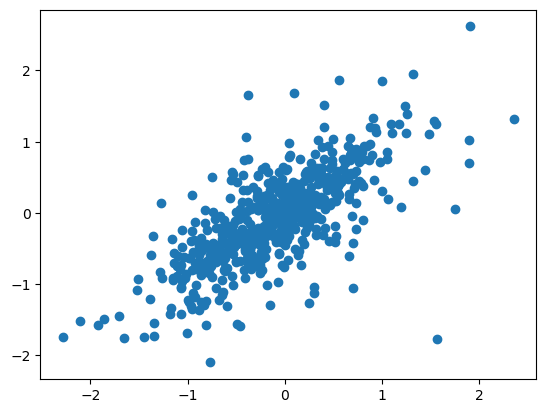

In [35]:
plt.scatter(train.iloc[:,0],train.iloc[:,1])

In [36]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
validation_scaled = scaler.transform(validation.drop(columns=['anomaly']))

In [37]:
# Apply PCA to reduce dimensionality (from 16,382 features to 2)
pca = PCA(n_components=2)
train_reduced = pca.fit_transform(train_scaled)
validation_reduced = pca.transform(validation_scaled)

In [38]:
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
# Fit Isolation Forest on reduced data
isolation_forest.fit(train_reduced)


IsolationForest(contamination=0.1, random_state=42)

In [39]:

validation_predictions = isolation_forest.predict(validation_reduced)
validation_predictions = np.where(validation_predictions == 1, 0, 1) 

In [47]:
index=np.where(validation_predictions==1)
index




(array([  4,  14,  16,  21,  24,  25,  28,  36,  43,  44,  45,  51,  53,
         54,  59,  63,  66,  73,  75,  78,  79,  80,  81,  82,  85,  88,
         90,  97,  99, 101, 113, 114, 115, 116, 120, 122, 123, 125, 131,
        132, 134, 143, 145, 147, 154, 161, 162, 169, 170, 171, 173, 177,
        178, 179, 183, 184, 188, 189, 190, 192, 199, 207, 208, 211, 213,
        221, 232, 237, 238, 239, 240, 243, 247, 255, 258, 259, 264, 266,
        274, 277, 279, 280, 282, 283, 284, 287, 300, 304, 307, 309, 310,
        314, 319, 329, 332, 334, 339, 345, 349, 353, 355, 369, 371, 375,
        376, 377, 380, 381, 389, 394, 396, 403, 404, 408, 411, 420, 423,
        424, 427, 431, 436, 438, 439, 442, 445, 446, 451, 452, 453, 455,
        461, 462, 463, 466, 468, 469, 470, 471, 472, 473, 474, 475, 478,
        492, 493, 494, 497, 498, 502, 504, 506, 512, 516, 517, 527, 528,
        534, 536, 540, 542, 543, 547, 551, 553, 554, 560, 563, 567, 576,
        577, 578, 580, 581, 582, 585, 589, 590], dt

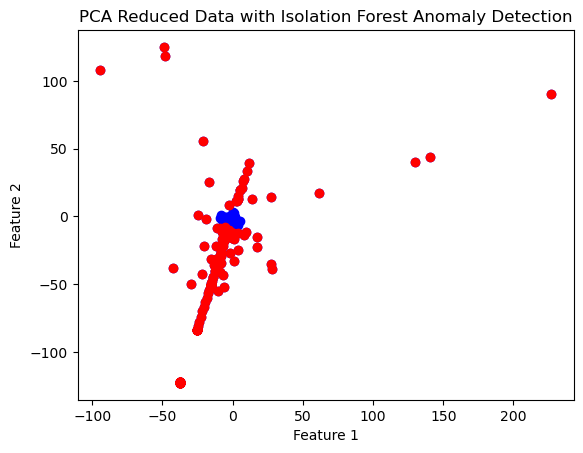

In [48]:
plt.scatter(validation_reduced[:, 0], validation_reduced[:, 1], c='blue', label='Normal Predictions')
plt.scatter(validation_reduced[index, 0], validation_reduced[index, 1],c='red', label='Anomalies')
plt.title("PCA Reduced Data with Isolation Forest Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [45]:
#s(x,m)=e2^-E(h(x))/c(m),h(x)=Average search depth for x from isolate point,c(m)=average depth of h(m)
#

In [49]:
accuracy = accuracy_score(validation_labels, validation_predictions)
print(f'Accuracy on Validation Set: {accuracy * 100:.2f}%')



Accuracy on Validation Set: 76.43%
